In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import numpy as np
import pandas as pd
from olympus import Olympus
from olympus import Database
from olympus import Surface
from olympus import Campaign
from olympus.scalarizers import Scalarizer

from olympus import Plotter

from olympus import list_planners

## Continuous synthetic surfaces

In [3]:
SURFACE = 'Levy'
NUM_REPS = 20
PLANNERS = ['RandomSearch', 'Sobol', 'Hyperopt']

In [4]:
olymp = Olympus()
database_cont = Database(kind='sqlite')

for PLANNER in PLANNERS:
    for repetition in range(NUM_REPS):
        print(f"Algorithm: {PLANNER} [repetition {repetition+1}]")

        olymp.run_analytic(
            planner=PLANNER,      # run simulation with <PLANNER>,
            surface=SURFACE,      # on emulator trained on dataset <DATASET>;
            param_dim=2,
            num_opts=None,
            campaign=Campaign(),  # store results in a new campaign, 
            goal='minimize',
            database=database_cont,    # but use the same database to store campaign;
            num_iter=25,         # run benchmark for 50 iterations
        )


Algorithm: RandomSearch [repetition 1]
param_vector :  [ParamVector(param_0 = 0.6422115887775017, param_1 = 0.053571518992302836), ParamVector(param_0 = 0.6422115887775017, param_1 = 0.053571518992302836)]
type param_vector :  <class 'list'>


TypeError: '<=' not supported between instances of 'float' and 'ObjectParameterVector'

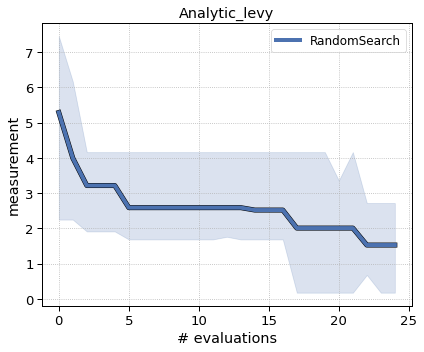

In [5]:
# test plotting
plotter = Plotter()
plotter.plot_from_db(database_cont)

## Categorical synthetic surfaces

In [5]:
SURFACE = 'CatMichalewicz'
NUM_REPS = 20
PLANNERS = ['RandomSearch', 'Botorch']

In [6]:
olymp = Olympus()
database_cat = Database(kind='sqlite')

for PLANNER in PLANNERS:
    for repetition in range(NUM_REPS):
        print(f"Algorithm: {PLANNER} [repetition {repetition+1}]")

        olymp.run_analytic(
            planner=PLANNER,      # run simulation with <PLANNER>,
            surface=SURFACE,      # on emulator trained on dataset <DATASET>;
            param_dim=2,
            num_opts=21,
            campaign=Campaign(),  # store results in a new campaign, 
            goal='minimize',
            database=database_cat,    # but use the same database to store campaign;
            num_iter=25,         # run benchmark for 50 iterations
        )

Algorithm: RandomSearch [repetition 1]
param_vector :  [ParamVector(param_0 = x16, param_1 = x15), ParamVector(param_0 = x16, param_1 = x15)]
type param_vector :  <class 'list'>


[WARNING] Not all parameters of [ParamVector(param_0 = x16, param_1 = x15)
 ParamVector(param_0 = x16, param_1 = x15)] are within bounds!


TypeError: unsupported operand type(s) for *: 'float' and 'ObjectParameterVector'

In [8]:
database_cat

<Database (name=olympus_63d9f09d, kind=sqlite)>

## Categorical real-world example

In [7]:
DATASET = 'perovskites'
NUM_REPS = 20
PLANNERS = ['RandomSearch']

In [8]:
olymp = Olympus()
database_cat_real = Database(kind='sqlite')

for PLANNER in PLANNERS:
    for repetition in range(NUM_REPS):
        print(f"Algorithm: {PLANNER} [repetition {repetition+1}]")

        olymp.run(
            planner=PLANNER,      # run simulation with <PLANNER>,
            dataset=DATASET,
            campaign=Campaign(),  # store results in a new campaign, 
            goal='minimize',
            database=database_cat_real,    # but use the same database to store campaign;
            num_iter=192,         # run benchmark for 50 iterations
        )

Algorithm: RandomSearch [repetition 1]
RandomSearch
param_vector :  [ParamVector(organic = ammonium, cation = Pb, anion = I), ParamVector(organic = ammonium, cation = Pb, anion = I)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = formamidinium, cation = Pb, anion = Br), ParamVector(organic = formamidinium, cation = Pb, anion = Br)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = propylammonium, cation = Sn, anion = F), ParamVector(organic = propylammonium, cation = Sn, anion = F)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = trimethylammonium, cation = Sn, anion = Cl), ParamVector(organic = trimethylammonium, cation = Sn, anion = Cl)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = hydroxylammonium, cation = Ge, anion = Br), ParamVector(organic = hydroxylammonium, cation = Ge, anion = Br)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = hydrazinium,

param_vector :  [ParamVector(organic = acetamidinium, cation = Ge, anion = Cl), ParamVector(organic = acetamidinium, cation = Ge, anion = Cl)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = formamidinium, cation = Ge, anion = Cl), ParamVector(organic = formamidinium, cation = Ge, anion = Cl)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = acetamidinium, cation = Pb, anion = Cl), ParamVector(organic = acetamidinium, cation = Pb, anion = Cl)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = propylammonium, cation = Pb, anion = F), ParamVector(organic = propylammonium, cation = Pb, anion = F)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = hydroxylammonium, cation = Sn, anion = I), ParamVector(organic = hydroxylammonium, cation = Sn, anion = I)]
type param_vector :  <class 'list'>
param_vector :  [ParamVector(organic = isopropylammonium, cation = Ge, anion = Br), ParamVector(organ

IndexError: index 192 is out of bounds for axis 0 with size 192

## Multiobjective optimization synthetic surfaces

In [9]:
SURFACE = 'MultFonseca'
NUM_REPS = 20
PLANNERS = ['RandomSearch', 'Sobol', 'Hyperopt']


In [10]:
olymp = Olympus()
database_moo = Database(kind='sqlite')


for PLANNER in PLANNERS:
    for repetition in range(NUM_REPS):
        print(f"Algorithm: {PLANNER} [repetition {repetition+1}]")
        
        
        scalarizer = Scalarizer(
            kind='Chimera',
            value_space=Surface(kind=SURFACE).value_space,
            goals=['min', 'min'],
            tolerances=[0.5, 0.5],
            absolutes=[True, True],
        )

        olymp.run_analytic(
            planner=PLANNER,      # run simulation with <PLANNER>,
            surface=SURFACE,      # on emulator trained on dataset <DATASET>;
            param_dim=2,
            campaign=Campaign(),  # store results in a new campaign, 
            scalarizer=scalarizer,
            goal='minimize',
            database=database_moo,    # but use the same database to store campaign;
            num_iter=25,         # run benchmark for 50 iterations
        )

Algorithm: RandomSearch [repetition 1]
param_vector :  [ParamVector(param_0 = 0.8829674115892606, param_1 = 0.772788076572017), ParamVector(param_0 = 0.8829674115892606, param_1 = 0.772788076572017)]
type param_vector :  <class 'list'>


[WARNING] Surface MultFonseca is only defined with 2 objectives: setting `value_dim`=2
[WARNING] Surface MultFonseca is only defined with 2 objectives: setting `value_dim`=2


TypeError: '<=' not supported between instances of 'float' and 'ObjectParameterVector'

In [14]:
database_moo.get_campaigns()

[<Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomSearch, num_iter=25)>,
 <Campaign (dataset=n/a, model=n/a, planner=RandomS

# Plotting development

## raw traces (`traces`)

continuous and categorical 

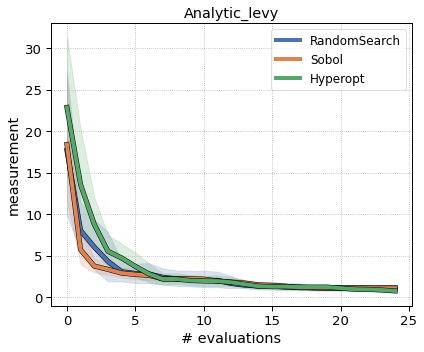

In [16]:
plotter = Plotter()
plotter.plot_from_db(kind='traces', database=database_cont)

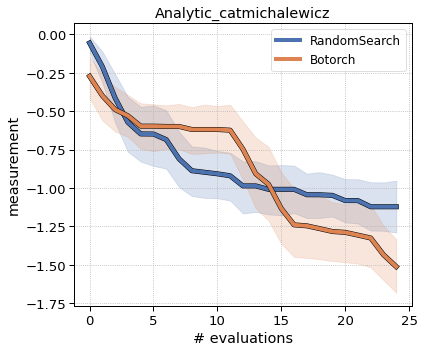

In [17]:
plotter = Plotter()
plotter.plot_from_db(kind='traces', database=database_cat)

## regret traces (`traces_regret`)

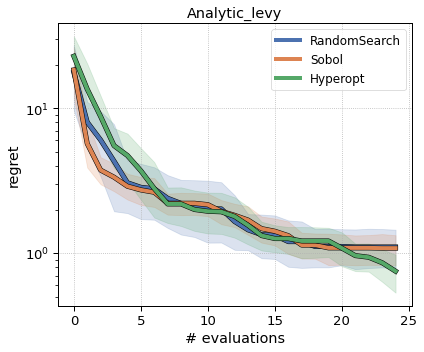

In [18]:
plotter = Plotter()
plotter.plot_from_db(kind='traces_regret', database=database_cont)

## rank traces (`traces_rank`)

fully categorical surfaces only

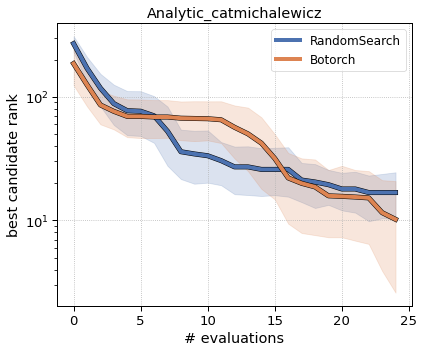

In [19]:
plotter = Plotter()
plotter.plot_from_db(kind='traces_rank', database=database_cat)

## fraction top-k candidates (`traces_fraction_top_k`)

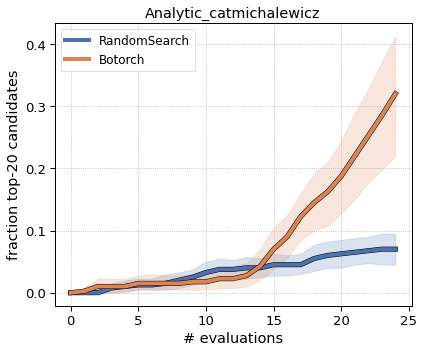

In [20]:
# number of candidates
plotter = Plotter()
plotter.plot_from_db(kind='traces_fraction_top_k', database=database_cat, threshold=20, is_percent=False)

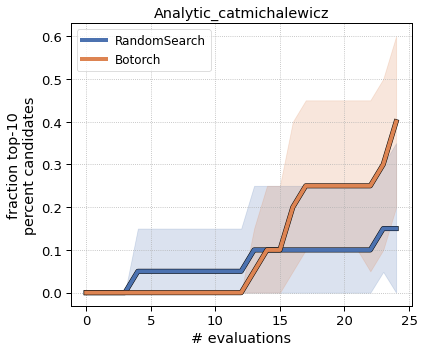

In [21]:
# percentage value
plotter = Plotter()
plotter.plot_from_db(kind='traces_fraction_top_k', database=database_cat, threshold=10, is_percent=True)

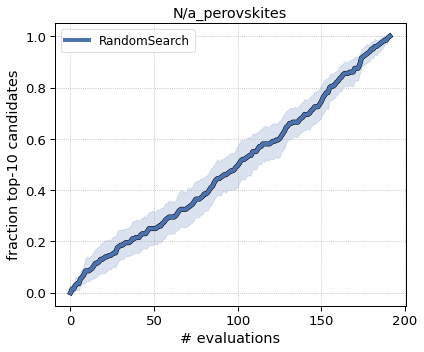

In [22]:
# real-world example
plotter = Plotter()
plotter.plot_from_db(kind='traces_fraction_top_k', database=database_cat_real, threshold=10, is_percent=False)

## num evals top-k candidate (`num_evals_top_k`)

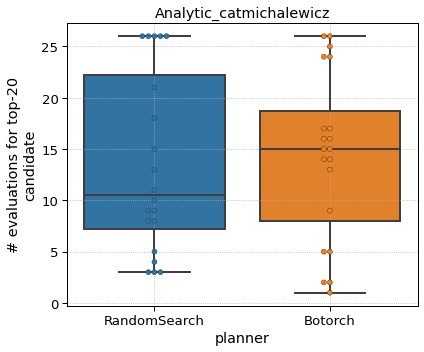

In [23]:
# number of candidates
plotter = Plotter()
plotter.plot_from_db(kind='num_evals_top_k', database=database_cat, threshold=20, is_percent=False)

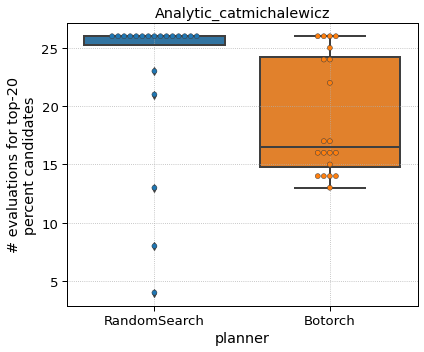

In [24]:
# percentage
plotter = Plotter()
plotter.plot_from_db(kind='num_evals_top_k', database=database_cat, threshold=20, is_percent=True)

## cumulative regret after x evaluations (`cumulative_regret_x_evals`)

continuous parameters only

In [41]:
plotter = Plotter()
plotter.plot_from_db(kind='regret_x_evals', database=database_cont, num_evals=20, is_cumulative=False)

TypeError: _plot_regret_x_evals() got multiple values for argument 'is_cumulative'

In [15]:
plotter = Plotter()
plotter.plot_from_db(kind='regret_x_evals', database=database_cont, num_evals=20, is_cumulative=True)

TypeError: _plot_regret_x_evals() got multiple values for argument 'is_cumulative'

##  plot hypervolume (`hypervolume`)

multi-objective optimization, only problems with 2 objectives (could potentially extend this to 3 objectives in the future)

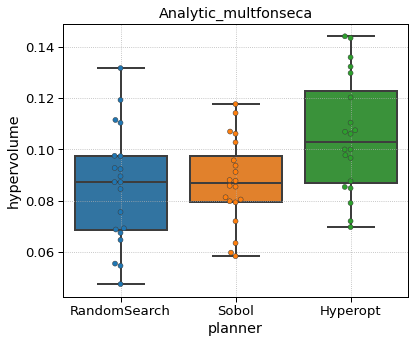

In [18]:
plotter = Plotter()
plotter.plot_from_db(kind='hypervolume', database=database_moo)

## plot pareto front (`pareto_front`)

In [20]:
plotter = Plotter()
plotter.plot_from_db(kind='pareto_front', database=database_moo)

['RandomSearch', 'Sobol', 'Hyperopt']
